In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
# os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# What is Keras?

## So, when to use neural networks?
* Dealing with unstructured data
* Don't need easily interpretable results
* You can benefit from a known architecture

Example: Classify images of cats and dogs
* Images -> Unstructured data
* You don't care about why the network knows it's a cat or a dog
* You can benefit from convolutional neural networks

# Your first neural network

## Parameters

Each connection from one neuron to another has an associated weight, w. Each neuron, except the input layer which just holds the input value, also has an extra weight and we call this the bias weight, b. During feed-forward our input gets transformed by weight multiplications and additions at each layer, the output of each neuron can also get transformed by the application of what we call an activation function. 

## Defining a neural network

In [7]:
# Create a new sequential model
model = Sequential()
# Add and input and dense layer
model.add(Dense(2, input_shape=(3,)))
# Add a final 1 neuron layer
model.add(Dense(1))

## Adding activations

In [8]:
# Create a new sequential model
model = Sequential()
# Add and input and dense layer
model.add(Dense(2, input_shape=(3,), activation="relu"))
# Add a final 1 neuron layer
model.add(Dense(1))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 8         
                                                                 
 dense_13 (Dense)            (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


## Exercises

### Hello nets!

You're going to build a simple neural network to get a feeling of how quickly it is to accomplish this in Keras.

You will build a network that takes two numbers as an input, passes them through a hidden layer of 10 neurons, and finally outputs a single non-constrained number.

A non-constrained output can be obtained by avoiding setting an activation function in the output layer. This is useful for problems like regression, when we want our output to be able to take any non-constrained value.

In [2]:
# Import the Sequential model and Dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Create a Sequential model
model = Sequential()
# Add an input layer and a hidden layer with 10 neurons
model.add(Dense(10, input_shape=(2,), activation="relu"))
# Add a 1-neuron output layer
model.add(Dense(1))
# Summarise your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


### Counting parameters

You've just created a neural network. But you're going to create a new one now, taking some time to think about the weights of each layer. The Keras Dense layer and the Sequential model are already loaded for you to use.

In [3]:
# Instantiate a new Sequential model
model = Sequential()
# Add a Dense layer with five neurons and three inputs
model.add(Dense(5, input_shape=(3,), activation="relu"))
# Add a final Dense layer with one neuron and no activation
model.add(Dense(1))
# Summarize your model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


* Weights arise from the connections between the neurons of the previous layer and the addition of the bias weights.
* Although it's possible to avoid using bias weights, Keras uses them by default.
* There are 20 parameters, 15 from the connections of our inputs to our hidden layer and 5 from the bias weight of each neuron in the hidden layer.

### Build as shown!

You will take on a final challenge before moving on to the next lesson. Build the network shown in the picture below. Prove your mastered Keras basics in no time!

In [5]:
# Instantiate a Sequential model
model = Sequential()
# Build the input and hidden layer
model.add(Dense(3, input_shape=(2,), activation='relu'))
# Add the ouput layer
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 9         
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


# Surviving a meteor strike

A meteor is approaching the earth and we want to make sure it won't take us to extinction. A group of scientists is trying to estimate the orbit by using historical data gathered about previous orbits of similar meteors.

Scientist have used this data alongside their knowledge to estimate an 80-minute orbit, that is, an orbit from -40 minutes to +40 minutes. t=0 corresponds to the time of crossing the impact region. It looks like the meteor will be close! Perhaps it won't hit us, but we must make sure we are right! 

You have data for the path a previous meteor took during a period of 20 minutes, 10 minutes before and 10 minutes after crossing the impact region. You will train a model on this data and then extrapolate your predictions to an 80-minute orbit to see how it compares to the scientists prediction. Will your orbit be similar to that of the scientists or are we facing the extinction of humanity as we know it?

## Exercise

### Specifying a model

You will build a simple regression model to predict the orbit of the meteor!

Your training data consist of measurements taken at time steps from -10 minutes before the impact region to +10 minutes after. Each time step can be viewed as an X coordinate in our graph, which has an associated position Y for the meteor orbit at that time step.

Note that you can view this problem as approximating a quadratic function via the use of neural networks.

This data is stored in two numpy arrays: one called time_steps , what we call features, and another called y_positions, with the labels. Go on and build your model! It should be able to predict the y positions for the meteor orbit at future time steps.

In [36]:
time_steps = np.array([-10.0,-9.98999499749875,-9.9799899949975,-9.969984992496249,-9.959979989994997,-9.949974987493746,-9.939969984992496,-9.929964982491246,-9.919959979989995,-9.909954977488745,-9.899949974987495,-9.889944972486242,-9.879939969984992,-9.869934967483742,-9.859929964982491,-9.849924962481241,-9.83991995997999,-9.829914957478739,-9.819909954977488,-9.809904952476238,-9.799899949974987,-9.789894947473737,-9.779889944972487,-9.769884942471236,-9.759879939969984,-9.749874937468734,-9.739869934967484,-9.729864932466233,-9.719859929964983,-9.709854927463732,-9.699849924962482,-9.68984492246123,-9.67983991995998,-9.66983491745873,-9.659829914957479,-9.649824912456229,-9.639819909954978,-9.629814907453726,-9.619809904952476,-9.609804902451225,-9.599799899949975,-9.589794897448725,-9.579789894947474,-9.569784892446224,-9.559779889944972,-9.549774887443721,-9.539769884942471,-9.52976488244122,-9.51975987993997,-9.50975487743872,-9.499749874937468,-9.489744872436217,-9.479739869934967,-9.469734867433717,-9.459729864932466,-9.449724862431216,-9.439719859929966,-9.429714857428714,-9.419709854927463,-9.409704852426213,-9.399699849924962,-9.389694847423712,-9.379689844922462,-9.369684842421211,-9.35967983991996,-9.349674837418709,-9.339669834917459,-9.329664832416208,-9.319659829914958,-9.309654827413707,-9.299649824912457,-9.289644822411205,-9.279639819909955,-9.269634817408704,-9.259629814907454,-9.249624812406203,-9.239619809904953,-9.229614807403703,-9.21960980490245,-9.2096048024012,-9.19959979989995,-9.1895947973987,-9.17958979489745,-9.169584792396199,-9.159579789894947,-9.149574787393696,-9.139569784892446,-9.129564782391196,-9.119559779889945,-9.109554777388695,-9.099549774887445,-9.089544772386192,-9.079539769884942,-9.069534767383692,-9.059529764882441,-9.049524762381191,-9.03951975987994,-9.029514757378688,-9.019509754877438,-9.009504752376188,-8.999499749874937,-8.989494747373687,-8.979489744872437,-8.969484742371186,-8.959479739869934,-8.949474737368684,-8.939469734867433,-8.929464732366183,-8.919459729864933,-8.909454727363682,-8.899449724862432,-8.88944472236118,-8.87943971985993,-8.86943471735868,-8.859429714857429,-8.849424712356178,-8.839419709854928,-8.829414707353678,-8.819409704852426,-8.809404702351175,-8.799399699849925,-8.789394697348675,-8.779389694847424,-8.769384692346174,-8.759379689844923,-8.749374687343671,-8.739369684842421,-8.72936468234117,-8.71935967983992,-8.70935467733867,-8.69934967483742,-8.689344672336167,-8.679339669834917,-8.669334667333667,-8.659329664832416,-8.649324662331166,-8.639319659829916,-8.629314657328663,-8.619309654827413,-8.609304652326163,-8.599299649824912,-8.589294647323662,-8.579289644822412,-8.569284642321161,-8.55927963981991,-8.549274637318659,-8.539269634817408,-8.529264632316158,-8.519259629814908,-8.509254627313657,-8.499249624812407,-8.489244622311155,-8.479239619809904,-8.469234617308654,-8.459229614807404,-8.449224612306153,-8.439219609804903,-8.429214607303653,-8.4192096048024,-8.40920460230115,-8.3991995997999,-8.38919459729865,-8.379189594797399,-8.369184592296149,-8.359179589794898,-8.349174587293646,-8.339169584792396,-8.329164582291146,-8.319159579789895,-8.309154577288645,-8.299149574787394,-8.289144572286144,-8.279139569784892,-8.269134567283642,-8.259129564782391,-8.24912456228114,-8.23911955977989,-8.229114557278638,-8.219109554777388,-8.209104552276138,-8.199099549774887,-8.189094547273637,-8.179089544772387,-8.169084542271136,-8.159079539769884,-8.149074537268634,-8.139069534767383,-8.129064532266133,-8.119059529764883,-8.109054527263632,-8.099049524762382,-8.08904452226113,-8.07903951975988,-8.069034517258629,-8.059029514757379,-8.049024512256128,-8.039019509754878,-8.029014507253628,-8.019009504752376,-8.009004502251125,-7.998999499749875,-7.988994497248624,-7.978989494747374,-7.968984492246124,-7.9589794897448725,-7.948974487243621,-7.938969484742371,-7.9289644822411205,-7.91895947973987,-7.90895447723862,-7.8989494747373685,-7.888944472236118,-7.878939469734867,-7.868934467233617,-7.858929464732366,-7.848924462231116,-7.8389194597298655,-7.828914457228614,-7.818909454727364,-7.808904452226113,-7.798899449724862,-7.788894447223612,-7.7788894447223615,-7.768884442221111,-7.75887943971986,-7.74887443721861,-7.738869434717358,-7.728864432216108,-7.718859429714858,-7.708854427213607,-7.698849424712357,-7.688844422211106,-7.678839419709854,-7.668834417208604,-7.658829414707354,-7.648824412206103,-7.638819409704853,-7.628814407203602,-7.618809404702351,-7.6088044022011,-7.59879939969985,-7.588794397198599,-7.578789394697349,-7.568784392196099,-7.558779389694847,-7.548774387193597,-7.538769384692346,-7.5287643821910955,-7.518759379689845,-7.508754377188595,-7.498749374687344,-7.488744372186093,-7.478739369684842,-7.4687343671835915,-7.458729364682341,-7.448724362181091,-7.43871935967984,-7.428714357178589,-7.418709354677339,-7.408704352176088,-7.398699349674837,-7.388694347173587,-7.3786893446723365,-7.368684342171086,-7.358679339669835,-7.3486743371685845,-7.338669334667333,-7.328664332166083,-7.318659329664833,-7.308654327163582,-7.298649324662332,-7.288644322161081,-7.278639319659829,-7.268634317158579,-7.258629314657329,-7.248624312156078,-7.238619309654828,-7.228614307153577,-7.218609304652326,-7.208604302151075,-7.198599299649825,-7.188594297148574,-7.178589294647324,-7.168584292146074,-7.158579289644822,-7.148574287143572,-7.138569284642321,-7.12856428214107,-7.11855927963982,-7.10855427713857,-7.098549274637319,-7.088544272136068,-7.078539269634817,-7.0685342671335665,-7.058529264632316,-7.048524262131066,-7.038519259629815,-7.028514257128564,-7.018509254627314,-7.0085042521260625,-6.998499249624812,-6.988494247123562,-6.9784892446223115,-6.968484242121061,-6.95847923961981,-6.9484742371185595,-6.938469234617308,-6.928464232116058,-6.9184592296148075,-6.908454227113557,-6.898449224612307,-6.888444222111056,-6.878439219609805,-6.868434217108554,-6.858429214607304,-6.848424212106053,-6.838419209604803,-6.8284142071035525,-6.818409204602301,-6.80840420210105,-6.7983991995998,-6.788394197098549,-6.778389194597299,-6.768384192096049,-6.758379189594797,-6.748374187093547,-6.738369184592296,-6.728364182091045,-6.718359179589795,-6.708354177088545,-6.698349174587294,-6.688344172086043,-6.678339169584793,-6.668334167083541,-6.658329164582291,-6.648324162081041,-6.63831915957979,-6.62831415707854,-6.618309154577289,-6.6083041520760375,-6.598299149574787,-6.588294147073537,-6.578289144572286,-6.568284142071036,-6.558279139569785,-6.5482741370685345,-6.538269134567283,-6.528264132066033,-6.5182591295647825,-6.508254127063532,-6.498249124562282,-6.4882441220610305,-6.47823911955978,-6.468234117058529,-6.4582291145572785,-6.448224112056028,-6.438219109554778,-6.4282141070535275,-6.418209104552276,-6.408204102051025,-6.398199099549775,-6.388194097048524,-6.378189094547274,-6.3681840920460235,-6.358179089544772,-6.348174087043522,-6.338169084542271,-6.32816408204102,-6.31815907953977,-6.30815407703852,-6.298149074537269,-6.288144072036018,-6.278139069534768,-6.268134067033516,-6.258129064532266,-6.248124062031016,-6.238119059529765,-6.228114057028515,-6.218109054527264,-6.2081040520260125,-6.198099049524762,-6.188094047023512,-6.178089044522261,-6.168084042021011,-6.15807903951976,-6.148074037018509,-6.138069034517258,-6.128064032016008,-6.118059029514757,-6.108054027013507,-6.098049024512257,-6.0880440220110055,-6.078039019509755,-6.068034017008504,-6.0580290145072535,-6.048024012006003,-6.038019009504753,-6.028014007003502,-6.018009004502251,-6.008004002001001,-5.99799899949975,-5.987993996998499,-5.977988994497249,-5.9679839919959985,-5.957978989494747,-5.947973986993497,-5.9379689844922465,-5.927963981990995,-5.917958979489745,-5.907953976988495,-5.897948974487243,-5.887943971985993,-5.877938969484743,-5.867933966983492,-5.857928964482241,-5.847923961980991,-5.83791895947974,-5.827913956978489,-5.817908954477239,-5.807903951975988,-5.797898949474737,-5.787893946973487,-5.777888944472236,-5.767883941970986,-5.757878939469735,-5.747873936968484,-5.737868934467234,-5.727863931965983,-5.717858929464732,-5.707853926963482,-5.697848924462232,-5.68784392196098,-5.67783891945973,-5.66783391695848,-5.6578289144572285,-5.647823911955978,-5.637818909454728,-5.6278139069534765,-5.617808904452226,-5.607803901950976,-5.597798899449725,-5.587793896948474,-5.577788894447224,-5.5677838919459735,-5.557778889444722,-5.547773886943472,-5.5377688844422215,-5.52776388194097,-5.51775887943972,-5.5077538769384695,-5.497748874437219,-5.487743871935968,-5.4777388694347176,-5.467733866933467,-5.457728864432216,-5.447723861930966,-5.437718859429715,-5.427713856928464,-5.417708854427214,-5.407703851925963,-5.397698849424713,-5.387693846923462,-5.377688844422211,-5.367683841920961,-5.35767883941971,-5.347673836918459,-5.337668834417209,-5.327663831915958,-5.317658829414707,-5.307653826913457,-5.297648824412207,-5.287643821910955,-5.277638819409705,-5.267633816908455,-5.257628814407203,-5.247623811905953,-5.237618809404703,-5.2276138069034515,-5.217608804402201,-5.207603801900951,-5.1975987993997,-5.187593796898449,-5.177588794397199,-5.167583791895948,-5.157578789394697,-5.147573786893447,-5.137568784392196,-5.127563781890945,-5.117558779389695,-5.1075537768884445,-5.097548774387194,-5.087543771885943,-5.0775387693846925,-5.067533766883442,-5.057528764382191,-5.0475237618809405,-5.03751875937969,-5.027513756878439,-5.017508754377189,-5.007503751875938,-4.997498749374688,-4.987493746873437,-4.977488744372186,-4.967483741870936,-4.957478739369685,-4.947473736868434,-4.937468734367184,-4.927463731865933,-4.917458729364682,-4.907453726863432,-4.897448724362182,-4.88744372186093,-4.87743871935968,-4.86743371685843,-4.857428714357178,-4.847423711855928,-4.837418709354678,-4.827413706853427,-4.817408704352176,-4.807403701850926,-4.797398699349675,-4.787393696848424,-4.777388694347174,-4.767383691845923,-4.757378689344672,-4.747373686843422,-4.737368684342171,-4.727363681840921,-4.71735867933967,-4.707353676838419,-4.697348674337169,-4.687343671835918,-4.6773386693346675,-4.667333666833417,-4.657328664332166,-4.6473236618309155,-4.637318659329665,-4.627313656828415,-4.6173086543271635,-4.607303651825913,-4.597298649324663,-4.587293646823412,-4.577288644322161,-4.567283641820911,-4.55727863931966,-4.547273636818409,-4.537268634317159,-4.5272636318159085,-4.517258629314657,-4.507253626813407,-4.4972486243121566,-4.487243621810905,-4.477238619309655,-4.467233616808405,-4.457228614307153,-4.447223611805903,-4.437218609304653,-4.427213606803402,-4.417208604302151,-4.407203601800901,-4.39719859929965,-4.387193596798399,-4.377188594297149,-4.367183591795898,-4.357178589294647,-4.347173586793397,-4.337168584292146,-4.327163581790896,-4.317158579289645,-4.307153576788394,-4.297148574287144,-4.287143571785893,-4.277138569284642,-4.267133566783392,-4.257128564282141,-4.2471235617808905,-4.23711855927964,-4.22711355677839,-4.2171085542771385,-4.207103551775888,-4.197098549274638,-4.1870935467733865,-4.177088544272136,-4.167083541770886,-4.1570785392696346,-4.147073536768384,-4.137068534267134,-4.1270635317658835,-4.117058529264632,-4.107053526763382,-4.0970485242621315,-4.08704352176088,-4.07703851925963,-4.0670335167583795,-4.057028514257128,-4.047023511755878,-4.037018509254628,-4.027013506753377,-4.017008504252126,-4.007003501750876,-3.9969984992496252,-3.986993496748374,-3.9769884942471236,-3.9669834917458733,-3.956978489244623,-3.9469734867433717,-3.9369684842421213,-3.926963481740871,-3.9169584792396197,-3.9069534767383693,-3.896948474237119,-3.8869434717358677,-3.8769384692346174,-3.866933466733367,-3.8569284642321167,-3.8469234617308654,-3.836918459229615,-3.8269134567283647,-3.8169084542271134,-3.806903451725863,-3.7968984492246127,-3.7868934467233615,-3.776888444222111,-3.7668834417208608,-3.7568784392196104,-3.746873436718359,-3.736868434217109,-3.7268634317158584,-3.716858429214607,-3.706853426713357,-3.6968484242121065,-3.686843421710855,-3.676838419209605,-3.6668334167083545,-3.656828414207104,-3.646823411705853,-3.6368184092046025,-3.626813406703352,-3.616808404202101,-3.6068034017008506,-3.5967983991996,-3.586793396698349,-3.5767883941970986,-3.5667833916958482,-3.556778389194598,-3.5467733866933466,-3.5367683841920963,-3.526763381690846,-3.5167583791895947,-3.5067533766883443,-3.496748374187094,-3.4867433716858427,-3.4767383691845923,-3.466733366683342,-3.4567283641820916,-3.4467233616808404,-3.43671835917959,-3.4267133566783397,-3.4167083541770884,-3.406703351675838,-3.3966983491745877,-3.3866933466733364,-3.376688344172086,-3.3666833416708357,-3.3566783391695854,-3.346673336668334,-3.3366683341670837,-3.3266633316658334,-3.316658329164582,-3.306653326663332,-3.2966483241620814,-3.28664332166083,-3.27663831915958,-3.2666333166583295,-3.256628314157079,-3.246623311655828,-3.2366183091545775,-3.226613306653327,-3.216608304152076,-3.2066033016508255,-3.196598299149575,-3.186593296648324,-3.1765882941470736,-3.166583291645823,-3.156578289144573,-3.1465732866433216,-3.1365682841420712,-3.126563281640821,-3.1165582791395696,-3.1065532766383193,-3.096548274137069,-3.0865432716358185,-3.0765382691345673,-3.066533266633317,-3.0565282641320666,-3.0465232616308153,-3.036518259129565,-3.0265132566283146,-3.0165082541270634,-3.006503251625813,-2.9964982491245626,-2.9864932466233123,-2.976488244122061,-2.9664832416208107,-2.9564782391195603,-2.946473236618309,-2.9364682341170587,-2.9264632316158083,-2.916458229114557,-2.9064532266133067,-2.8964482241120564,-2.886443221610806,-2.8764382191095548,-2.8664332166083044,-2.856428214107054,-2.846423211605803,-2.8364182091045524,-2.826413206603302,-2.816408204102051,-2.8064032016008005,-2.79639819909955,-2.7863931965982998,-2.7763881940970485,-2.766383191595798,-2.756378189094548,-2.7463731865932965,-2.736368184092046,-2.726363181590796,-2.7163581790895446,-2.706353176588294,-2.696348174087044,-2.6863431715857935,-2.6763381690845423,-2.666333166583292,-2.6563281640820415,-2.6463231615807903,-2.63631815907954,-2.6263131565782896,-2.6163081540770383,-2.606303151575788,-2.5962981490745376,-2.5862931465732872,-2.576288144072036,-2.5662831415707856,-2.5562781390695353,-2.546273136568284,-2.5362681340670337,-2.5262631315657833,-2.516258129064532,-2.5062531265632817,-2.4962481240620313,-2.486243121560781,-2.4762381190595297,-2.4662331165582794,-2.456228114057029,-2.4462231115557778,-2.4362181090545274,-2.426213106553277,-2.416208104052026,-2.4062031015507754,-2.396198099049525,-2.3861930965482747,-2.3761880940470235,-2.366183091545773,-2.3561780890445227,-2.3461730865432715,-2.336168084042021,-2.326163081540771,-2.3161580790395195,-2.306153076538269,-2.296148074037019,-2.2861430715357685,-2.276138069034517,-2.266133066533267,-2.2561280640320165,-2.2461230615307652,-2.236118059029515,-2.2261130565282645,-2.216108054027014,-2.206103051525763,-2.1960980490245126,-2.186093046523262,-2.176088044022011,-2.1660830415207606,-2.1560780390195102,-2.146073036518259,-2.1360680340170086,-2.1260630315157583,-2.116058029014508,-2.1060530265132567,-2.0960480240120063,-2.086043021510756,-2.0760380190095047,-2.0660330165082543,-2.056028014007004,-2.0460230115057527,-2.0360180090045024,-2.026013006503252,-2.0160080040020016,-2.0060030015007504,-1.9959979989994991,-1.9859929964982488,-1.9759879939969984,-1.965982991495748,-1.9559779889944977,-1.9459729864932473,-1.935967983991997,-1.9259629814907449,-1.9159579789894945,-1.9059529764882441,-1.8959479739869938,-1.8859429714857434,-1.875937968984493,-1.8659329664832427,-1.8559279639819906,-1.8459229614807402,-1.8359179589794898,-1.8259129564782395,-1.8159079539769891,-1.8059029514757388,-1.7958979489744866,-1.7858929464732363,-1.775887943971986,-1.7658829414707355,-1.7558779389694852,-1.7458729364682348,-1.7358679339669845,-1.7258629314657323,-1.715857928964482,-1.7058529264632316,-1.6958479239619813,-1.685842921460731,-1.6758379189594805,-1.6658329164582302,-1.655827913956978,-1.6458229114557277,-1.6358179089544773,-1.625812906453227,-1.6158079039519766,-1.6058029014507262,-1.595797898949474,-1.5857928964482237,-1.5757878939469734,-1.565782891445723,-1.5557778889444727,-1.5457728864432223,-1.535767883941972,-1.5257628814407198,-1.5157578789394694,-1.505752876438219,-1.4957478739369687,-1.4857428714357184,-1.475737868934468,-1.4657328664332177,-1.4557278639319655,-1.4457228614307152,-1.4357178589294648,-1.4257128564282144,-1.415707853926964,-1.4057028514257137,-1.3956978489244634,-1.3856928464232112,-1.3756878439219609,-1.3656828414207105,-1.3556778389194601,-1.3456728364182098,-1.3356678339169594,-1.3256628314157073,-1.315657828914457,-1.3056528264132066,-1.2956478239119562,-1.2856428214107058,-1.2756378189094555,-1.2656328164082051,-1.255627813906953,-1.2456228114057026,-1.2356178089044523,-1.225612806403202,-1.2156078039019516,-1.2056028014007012,-1.1955977988994508,-1.1855927963981987,-1.1755877938969483,-1.165582791395698,-1.1555777888944476,-1.1455727863931973,-1.135567783891947,-1.1255627813906948,-1.1155577788894444,-1.105552776388194,-1.0955477738869437,-1.0855427713856933,-1.075537768884443,-1.0655327663831926,-1.0555277638819405,-1.0455227613806901,-1.0355177588794398,-1.0255127563781894,-1.015507753876939,-1.0055027513756887,-0.9954977488744383,-0.9854927463731862,-0.9754877438719358,-0.9654827413706855,-0.9554777388694351,-0.9454727363681847,-0.9354677338669344,-0.9254627313656822,-0.9154577288644319,-0.9054527263631815,-0.8954477238619312,-0.8854427213606808,-0.8754377188594304,-0.8654327163581801,-0.855427713856928,-0.8454227113556776,-0.8354177088544272,-0.8254127063531769,-0.8154077038519265,-0.8054027013506762,-0.7953976988494258,-0.7853926963481737,-0.7753876938469233,-0.7653826913456729,-0.7553776888444226,-0.7453726863431722,-0.7353676838419219,-0.7253626813406697,-0.7153576788394194,-0.705352676338169,-0.6953476738369186,-0.6853426713356683,-0.6753376688344179,-0.6653326663331676,-0.6553276638319154,-0.6453226613306651,-0.6353176588294147,-0.6253126563281644,-0.615307653826914,-0.6053026513256636,-0.5952976488244133,-0.5852926463231611,-0.5752876438219108,-0.5652826413206604,-0.5552776388194101,-0.5452726363181597,-0.5352676338169093,-0.525262631315659,-0.5152576288144068,-0.5052526263131565,-0.4952476238119061,-0.48524262131065576,-0.4752376188094054,-0.46523261630815504,-0.4552276138069029,-0.44522261130565255,-0.4352176088044022,-0.42521260630315183,-0.41520760380190147,-0.4052026013006511,-0.39519759879940075,-0.3851925962981486,-0.37518759379689826,-0.3651825912956479,-0.35517758879439754,-0.3451725862931472,-0.3351675837918968,-0.32516258129064646,-0.3151575787893943,-0.30515257628814396,-0.2951475737868936,-0.28514257128564324,-0.2751375687843929,-0.2651325662831425,-0.2551275637818904,-0.24512256128064003,-0.23511755877938967,-0.2251125562781393,-0.21510755377688895,-0.2051025512756386,-0.19509754877438823,-0.1850925462731361,-0.17508754377188573,-0.16508254127063537,-0.15507753876938501,-0.14507253626813466,-0.1350675337668843,-0.12506253126563394,-0.1150575287643818,-0.10505252626313144,-0.09504752376188108,-0.08504252126063072,-0.07503751875938036,-0.06503251625813,-0.055027513756877866,-0.045022511255627506,-0.03501750875437715,-0.025012506253126787,-0.015007503751876428,-0.005002501250626068,0.005002501250624292,0.015007503751876428,0.025012506253126787,0.03501750875437715,0.045022511255627506,0.055027513756877866,0.06503251625812823,0.07503751875937859,0.08504252126063072,0.09504752376188108,0.10505252626313144,0.1150575287643818,0.12506253126563216,0.13506753376688252,0.14507253626813466,0.15507753876938501,0.16508254127063537,0.17508754377188573,0.1850925462731361,0.19509754877438645,0.2051025512756368,0.21510755377688895,0.2251125562781393,0.23511755877938967,0.24512256128064003,0.2551275637818904,0.26513256628314075,0.2751375687843911,0.28514257128564324,0.2951475737868936,0.30515257628814396,0.3151575787893943,0.3251625812906447,0.33516758379189504,0.3451725862931454,0.35517758879439754,0.3651825912956479,0.37518759379689826,0.3851925962981486,0.395197598799399,0.40520260130064933,0.41520760380190147,0.42521260630315183,0.4352176088044022,0.44522261130565255,0.4552276138069029,0.46523261630815327,0.47523761880940363,0.48524262131065576,0.4952476238119061,0.5052526263131565,0.5152576288144068,0.5252626313156572,0.5352676338169076,0.5452726363181579,0.5552776388194101,0.5652826413206604,0.5752876438219108,0.5852926463231611,0.5952976488244115,0.6053026513256619,0.615307653826914,0.6253126563281644,0.6353176588294147,0.6453226613306651,0.6553276638319154,0.6653326663331658,0.6753376688344161,0.6853426713356683,0.6953476738369186,0.705352676338169,0.7153576788394194,0.7253626813406697,0.7353676838419201,0.7453726863431704,0.7553776888444226,0.7653826913456729,0.7753876938469233,0.7853926963481737,0.795397698849424,0.8054027013506744,0.8154077038519265,0.8254127063531769,0.8354177088544272,0.8454227113556776,0.855427713856928,0.8654327163581783,0.8754377188594287,0.8854427213606808,0.8954477238619312,0.9054527263631815,0.9154577288644319,0.9254627313656822,0.9354677338669326,0.945472736368183,0.9554777388694351,0.9654827413706855,0.9754877438719358,0.9854927463731862,0.9954977488744365,1.005502751375687,1.015507753876939,1.0255127563781894,1.0355177588794398,1.0455227613806901,1.0555277638819405,1.0655327663831908,1.0755377688844412,1.0855427713856933,1.0955477738869437,1.105552776388194,1.1155577788894444,1.1255627813906948,1.1355677838919451,1.1455727863931955,1.1555777888944476,1.165582791395698,1.1755877938969483,1.1855927963981987,1.195597798899449,1.2056028014006994,1.2156078039019498,1.225612806403202,1.2356178089044523,1.2456228114057026,1.255627813906953,1.2656328164082034,1.2756378189094537,1.2856428214107058,1.2956478239119562,1.3056528264132066,1.315657828914457,1.3256628314157073,1.3356678339169576,1.345672836418208,1.3556778389194601,1.3656828414207105,1.3756878439219609,1.3856928464232112,1.3956978489244616,1.405702851425712,1.4157078539269623,1.4257128564282144,1.4357178589294648,1.4457228614307152,1.4557278639319655,1.4657328664332159,1.4757378689344662,1.4857428714357184,1.4957478739369687,1.505752876438219,1.5157578789394694,1.5257628814407198,1.5357678839419702,1.5457728864432205,1.5557778889444727,1.565782891445723,1.5757878939469734,1.5857928964482237,1.595797898949474,1.6058029014507245,1.6158079039519748,1.625812906453227,1.6358179089544773,1.6458229114557277,1.655827913956978,1.6658329164582284,1.6758379189594788,1.685842921460731,1.6958479239619813,1.7058529264632316,1.715857928964482,1.7258629314657323,1.7358679339669827,1.745872936468233,1.7558779389694852,1.7658829414707355,1.775887943971986,1.7858929464732363,1.7958979489744866,1.805902951475737,1.8159079539769873,1.8259129564782395,1.8359179589794898,1.8459229614807402,1.8559279639819906,1.865932966483241,1.8759379689844913,1.8859429714857434,1.8959479739869938,1.9059529764882441,1.9159579789894945,1.9259629814907449,1.9359679839919952,1.9459729864932456,1.9559779889944977,1.965982991495748,1.9759879939969984,1.9859929964982488,1.9959979989994991,2.0060030015007495,2.016008004002,2.026013006503252,2.0360180090045024,2.0460230115057527,2.056028014007003,2.0660330165082534,2.076038019009504,2.086043021510754,2.0960480240120063,2.1060530265132567,2.116058029014507,2.1260630315157574,2.1360680340170077,2.146073036518258,2.1560780390195102,2.1660830415207606,2.176088044022011,2.1860930465232613,2.1960980490245117,2.206103051525762,2.2161080540270124,2.2261130565282645,2.236118059029515,2.2461230615307652,2.2561280640320156,2.266133066533266,2.2761380690345163,2.2861430715357667,2.296148074037019,2.306153076538269,2.3161580790395195,2.32616308154077,2.3361680840420203,2.3461730865432706,2.3561780890445227,2.366183091545773,2.3761880940470235,2.386193096548274,2.396198099049524,2.4062031015507745,2.416208104052025,2.426213106553277,2.4362181090545274,2.4462231115557778,2.456228114057028,2.4662331165582785,2.476238119059529,2.486243121560779,2.4962481240620313,2.5062531265632817,2.516258129064532,2.5262631315657824,2.5362681340670328,2.546273136568283,2.5562781390695353,2.5662831415707856,2.576288144072036,2.5862931465732864,2.5962981490745367,2.606303151575787,2.6163081540770374,2.6263131565782896,2.63631815907954,2.6463231615807903,2.6563281640820406,2.666333166583291,2.6763381690845414,2.6863431715857917,2.696348174087044,2.706353176588294,2.7163581790895446,2.726363181590795,2.7363681840920453,2.7463731865932957,2.756378189094548,2.766383191595798,2.7763881940970485,2.786393196598299,2.7963981990995492,2.8064032016007996,2.81640820410205,2.826413206603302,2.8364182091045524,2.846423211605803,2.856428214107053,2.8664332166083035,2.876438219109554,2.8864432216108042,2.8964482241120564,2.9064532266133067,2.916458229114557,2.9264632316158075,2.936468234117058,2.946473236618308,2.9564782391195585,2.9664832416208107,2.976488244122061,2.9864932466233114,2.9964982491245618,3.006503251625812,3.0165082541270625,3.0265132566283146,3.036518259129565,3.0465232616308153,3.0565282641320657,3.066533266633316,3.0765382691345664,3.0865432716358168,3.096548274137069,3.1065532766383193,3.1165582791395696,3.12656328164082,3.1365682841420703,3.1465732866433207,3.156578289144571,3.166583291645823,3.1765882941470736,3.186593296648324,3.1965982991495743,3.2066033016508246,3.216608304152075,3.226613306653327,3.2366183091545775,3.246623311655828,3.256628314157078,3.2666333166583286,3.276638319159579,3.2866433216608293,3.2966483241620814,3.306653326663332,3.316658329164582,3.3266633316658325,3.336668334167083,3.346673336668333,3.3566783391695836,3.3666833416708357,3.376688344172086,3.3866933466733364,3.396698349174587,3.406703351675837,3.4167083541770875,3.4267133566783397,3.43671835917959,3.4467233616808404,3.4567283641820907,3.466733366683341,3.4767383691845914,3.486743371685842,3.496748374187094,3.5067533766883443,3.5167583791895947,3.526763381690845,3.5367683841920954,3.5467733866933457,3.556778389194596,3.5667833916958482,3.5767883941970986,3.586793396698349,3.5967983991995993,3.6068034017008497,3.6168084042021,3.626813406703352,3.6368184092046025,3.646823411705853,3.6568284142071033,3.6668334167083536,3.676838419209604,3.6868434217108543,3.6968484242121065,3.706853426713357,3.716858429214607,3.7268634317158575,3.736868434217108,3.7468734367183583,3.7568784392196086,3.7668834417208608,3.776888444222111,3.7868934467233615,3.796898449224612,3.806903451725862,3.8169084542271126,3.826913456728363,3.836918459229615,3.8469234617308654,3.8569284642321158,3.866933466733366,3.8769384692346165,3.886943471735867,3.896948474237119,3.9069534767383693,3.9169584792396197,3.92696348174087,3.9369684842421204,3.946973486743371,3.956978489244621,3.9669834917458733,3.9769884942471236,3.986993496748374,3.9969984992496244,4.007003501750875,4.017008504252125,4.027013506753375,4.037018509254628,4.047023511755878,4.057028514257128,4.067033516758379,4.077038519259629,4.087043521760879,4.0970485242621315,4.107053526763382,4.117058529264632,4.127063531765883,4.137068534267133,4.147073536768383,4.157078539269634,4.167083541770886,4.177088544272136,4.1870935467733865,4.197098549274637,4.207103551775887,4.217108554277138,4.227113556778388,4.23711855927964,4.2471235617808905,4.257128564282141,4.267133566783391,4.2771385692846415,4.287143571785892,4.297148574287144,4.307153576788394,4.317158579289645,4.327163581790895,4.3371685842921455,4.347173586793396,4.357178589294646,4.367183591795898,4.377188594297149,4.387193596798399,4.397198599299649,4.4072036018009,4.41720860430215,4.4272136068034005,4.437218609304653,4.447223611805903,4.457228614307153,4.467233616808404,4.477238619309654,4.487243621810904,4.4972486243121566,4.507253626813407,4.517258629314657,4.527263631815908,4.537268634317158,4.547273636818408,4.557278639319659,4.567283641820911,4.577288644322161,4.587293646823412,4.597298649324662,4.607303651825912,4.617308654327163,4.627313656828413,4.637318659329665,4.6473236618309155,4.657328664332166,4.667333666833416,4.677338669334667,4.687343671835917,4.697348674337167,4.707353676838419,4.71735867933967,4.72736368184092,4.7373686843421705,4.747373686843421,4.757378689344671,4.767383691845923,4.777388694347174,4.787393696848424,4.7973986993496744,4.807403701850925,4.817408704352175,4.8274137068534255,4.837418709354678,4.847423711855928,4.857428714357178,4.867433716858429,4.877438719359679,4.8874437218609295,4.89744872436218,4.907453726863432,4.917458729364682,4.927463731865933,4.937468734367183,4.947473736868433,4.957478739369684,4.967483741870936,4.977488744372186,4.987493746873437,4.997498749374687,5.007503751875937,5.017508754377188,5.027513756878438,5.03751875937969,5.0475237618809405,5.057528764382191,5.067533766883441,5.077538769384692,5.087543771885942,5.097548774387192,5.1075537768884445,5.117558779389695,5.127563781890945,5.1375687843921956,5.147573786893446,5.157578789394696,5.167583791895948,5.177588794397199,5.187593796898449,5.1975987993996995,5.20760380190095,5.2176088044022,5.227613806903451,5.237618809404703,5.247623811905953,5.257628814407203,5.267633816908454,5.277638819409704,5.2876438219109545,5.297648824412205,5.307653826913457,5.317658829414707,5.327663831915958,5.337668834417208,5.347673836918458,5.357678839419709,5.367683841920961,5.377688844422211,5.387693846923462,5.397698849424712,5.407703851925962,5.417708854427213,5.427713856928463,5.437718859429715,5.447723861930966,5.457728864432216,5.467733866933466,5.477738869434717,5.487743871935967,5.497748874437217,5.5077538769384695,5.51775887943972,5.52776388194097,5.537768884442221,5.547773886943471,5.557778889444721,5.567783891945972,5.577788894447224,5.587793896948474,5.5977988994497245,5.607803901950975,5.617808904452225,5.627813906953476,5.637818909454728,5.647823911955978,5.6578289144572285,5.667833916958479,5.677838919459729,5.6878439219609795,5.69784892446223,5.707853926963482,5.717858929464732,5.727863931965983,5.737868934467233,5.7478739369684835,5.757878939469734,5.767883941970984,5.777888944472236,5.787893946973487,5.797898949474737,5.807903951975987,5.817908954477238,5.827913956978488,5.83791895947974,5.847923961980991,5.857928964482241,5.867933966983491,5.877938969484742,5.887943971985992,5.897948974487242,5.907953976988495,5.917958979489745,5.927963981990995,5.937968984492246,5.947973986993496,5.957978989494746,5.967983991995997,5.977988994497249,5.987993996998499,5.99799899949975,6.008004002001002,6.01800900450225,6.028014007003502,6.038019009504751,6.048024012006003,6.058029014507252,6.068034017008504,6.078039019509756,6.088044022011005,6.098049024512257,6.108054027013505,6.118059029514757,6.128064032016006,6.138069034517258,6.14807403701851,6.158079039519759,6.168084042021011,6.17808904452226,6.188094047023512,6.19809904952476,6.2081040520260125,6.218109054527265,6.228114057028513,6.238119059529765,6.248124062031014,6.258129064532266,6.268134067033515,6.278139069534767,6.288144072036019,6.2981490745372675,6.30815407703852,6.318159079539768,6.32816408204102,6.338169084542269,6.348174087043521,6.358179089544773,6.368184092046022,6.378189094547274,6.3881940970485225,6.398199099549775,6.408204102051027,6.418209104552275,6.4282141070535275,6.438219109554776,6.448224112056028,6.458229114557277,6.468234117058529,6.478239119559781,6.48824412206103,6.498249124562282,6.50825412706353,6.5182591295647825,6.528264132066031,6.538269134567283,6.548274137068535,6.558279139569784,6.568284142071036,6.578289144572285,6.588294147073537,6.598299149574785,6.6083041520760375,6.61830915457729,6.628314157078538,6.63831915957979,6.648324162081039,6.658329164582291,6.66833416708354,6.678339169584792,6.688344172086044,6.6983491745872925,6.708354177088545,6.718359179589793,6.728364182091045,6.738369184592294,6.748374187093546,6.758379189594798,6.768384192096047,6.778389194597299,6.7883941970985475,6.7983991995998,6.808404202101052,6.8184092046023,6.8284142071035525,6.838419209604801,6.848424212106053,6.858429214607302,6.868434217108554,6.878439219609806,6.888444222111055,6.898449224612307,6.908454227113555,6.9184592296148075,6.928464232116056,6.938469234617308,6.94847423711856,6.958479239619809,6.968484242121061,6.97848924462231,6.988494247123562,6.99849924962481,7.0085042521260625,7.018509254627315,7.028514257128563,7.038519259629815,7.048524262131064,7.058529264632316,7.068534267133565,7.078539269634817,7.088544272136069,7.0985492746373176,7.10855427713857,7.118559279639818,7.12856428214107,7.138569284642319,7.148574287143571,7.158579289644823,7.168584292146072,7.178589294647324,7.188594297148573,7.198599299649825,7.208604302151073,7.218609304652325,7.228614307153578,7.238619309654826,7.248624312156078,7.258629314657327,7.268634317158579,7.278639319659831,7.28864432216108,7.298649324662332,7.30865432716358,7.318659329664833,7.328664332166081,7.338669334667333,7.348674337168585,7.358679339669834,7.368684342171086,7.378689344672335,7.388694347173587,7.3986993496748354,7.408704352176088,7.41870935467734,7.428714357178588,7.43871935967984,7.448724362181089,7.458729364682341,7.46873436718359,7.478739369684842,7.488744372186094,7.498749374687343,7.508754377188595,7.518759379689843,7.5287643821910955,7.538769384692344,7.548774387193596,7.558779389694848,7.568784392196097,7.578789394697349,7.588794397198598,7.59879939969985,7.608804402201098,7.6188094047023505,7.628814407203603,7.638819409704851,7.648824412206103,7.658829414707352,7.668834417208604,7.678839419709856,7.688844422211105,7.698849424712357,7.7088544272136055,7.718859429714858,7.728864432216106,7.738869434717358,7.7488744372186105,7.758879439719859,7.768884442221111,7.77888944472236,7.788894447223612,7.7988994497248605,7.808904452226113,7.818909454727365,7.828914457228613,7.8389194597298655,7.848924462231114,7.858929464732366,7.868934467233615,7.878939469734867,7.888944472236119,7.898949474737368,7.90895447723862,7.918959479739868,7.9289644822411205,7.938969484742369,7.948974487243621,7.958979489744873,7.968984492246122,7.978989494747374,7.988994497248623,7.998999499749875,8.009004502251123,8.019009504752376,8.029014507253628,8.039019509754876,8.049024512256128,8.059029514757377,8.069034517258629,8.079039519759878,8.08904452226113,8.099049524762382,8.10905452726363,8.119059529764883,8.129064532266131,8.139069534767383,8.149074537268636,8.159079539769884,8.169084542271136,8.179089544772385,8.189094547273637,8.199099549774886,8.209104552276138,8.21910955477739,8.229114557278638,8.23911955977989,8.249124562281139,8.259129564782391,8.26913456728364,8.279139569784892,8.289144572286144,8.299149574787393,8.309154577288645,8.319159579789893,8.329164582291146,8.339169584792394,8.349174587293646,8.359179589794898,8.369184592296147,8.379189594797399,8.389194597298648,8.3991995997999,8.409204602301148,8.4192096048024,8.429214607303653,8.439219609804901,8.449224612306153,8.459229614807402,8.469234617308654,8.479239619809903,8.489244622311155,8.499249624812407,8.509254627313656,8.519259629814908,8.529264632316156,8.539269634817408,8.54927463731866,8.55927963981991,8.569284642321161,8.57928964482241,8.589294647323662,8.59929964982491,8.609304652326163,8.619309654827415,8.629314657328663,8.639319659829916,8.649324662331164,8.659329664832416,8.669334667333665,8.679339669834917,8.68934467233617,8.699349674837418,8.70935467733867,8.719359679839918,8.72936468234117,8.73936968484242,8.749374687343671,8.759379689844923,8.769384692346172,8.779389694847424,8.789394697348673,8.799399699849925,8.809404702351173,8.819409704852426,8.829414707353678,8.839419709854926,8.849424712356178,8.859429714857427,8.86943471735868,8.879439719859928,8.88944472236118,8.899449724862432,8.90945472736368,8.919459729864933,8.929464732366181,8.939469734867433,8.949474737368682,8.959479739869934,8.969484742371186,8.979489744872435,8.989494747373687,8.999499749874936,9.009504752376188,9.01950975487744,9.029514757378688,9.03951975987994,9.04952476238119,9.059529764882441,9.06953476738369,9.079539769884942,9.089544772386194,9.099549774887443,9.109554777388695,9.119559779889943,9.129564782391196,9.139569784892444,9.149574787393696,9.159579789894948,9.169584792396197,9.17958979489745,9.189594797398698,9.19959979989995,9.209604802401198,9.21960980490245,9.229614807403703,9.239619809904951,9.249624812406203,9.259629814907452,9.269634817408704,9.279639819909953,9.289644822411205,9.299649824912457,9.309654827413706,9.319659829914958,9.329664832416206,9.339669834917459,9.349674837418707,9.35967983991996,9.369684842421211,9.37968984492246,9.389694847423712,9.39969984992496,9.409704852426213,9.419709854927465,9.429714857428714,9.439719859929966,9.449724862431214,9.459729864932466,9.469734867433715,9.479739869934967,9.48974487243622,9.499749874937468,9.50975487743872,9.519759879939969,9.52976488244122,9.53976988494247,9.549774887443721,9.559779889944974,9.569784892446222,9.579789894947474,9.589794897448723,9.599799899949975,9.609804902451224,9.619809904952476,9.629814907453728,9.639819909954976,9.649824912456229,9.659829914957477,9.66983491745873,9.679839919959978,9.68984492246123,9.699849924962482,9.70985492746373,9.719859929964983,9.729864932466231,9.739869934967484,9.749874937468732,9.759879939969984,9.769884942471236,9.779889944972485,9.789894947473737,9.799899949974986,9.809904952476238,9.819909954977486,9.829914957478739,9.83991995997999,9.84992496248124,9.859929964982491,9.86993496748374,9.879939969984992,9.889944972486244,9.899949974987493,9.909954977488745,9.919959979989994,9.929964982491246,9.939969984992494,9.949974987493746,9.959979989994999,9.969984992496247,9.9799899949975,9.989994997498748,10.0])
y_positions = np.array([100.0,99.80000005005004,99.60020030025018,99.40060075060043,99.20120140110073,99.00200225175118,98.80300330255172,98.60420455350237,98.40560600460311,98.20720765585395,98.0090095072549,97.8110115588059,97.61321381050705,97.41561626235828,97.21821891435964,97.02102176651108,96.82402481881262,96.62722807126423,96.43063152386597,96.23423517661782,96.03803902951977,95.8420430825718,95.64624733577395,95.4506517891262,95.25525644262851,95.06006129628095,94.8650663500835,94.67027160403613,94.47567705813888,94.28128271239173,94.08708856679468,93.89309462134769,93.69930087605083,93.50570733090407,93.31231398590741,93.11912084106086,92.9261278963644,92.73333515181801,92.54074260742176,92.3483502631756,92.15615811907955,91.9641661751336,91.77237443133774,91.58078288769198,91.3893915441963,91.19820040085074,91.00720945765529,90.81641871460994,90.62582817171467,90.43543782896953,90.24524768637444,90.05525774392949,89.86546800163462,89.67587845948987,89.48648911749522,89.29729997565066,89.10831103395621,88.91952229241183,88.73093375101757,88.54254540977341,88.35435726867937,88.16636932773541,87.97858158694156,87.7909940462978,87.60360670580411,87.41641956546056,87.22943262526711,87.04264588522375,86.8560593453305,86.66967300558734,86.4834868659943,86.29750092655131,86.11171518725845,85.9261296481157,85.74074430912304,85.55555917028049,85.37057423158804,85.18578949304569,85.0012049546534,84.81682061641125,84.6326364783192,84.44865254037724,84.2648688025854,84.08128526494365,83.89790192745195,83.71471879011041,83.53173585291896,83.3489531158776,83.16637057898635,82.98398824224519,82.80180610565414,82.61982416921316,82.4380424329223,82.25646089678155,82.0750795607909,81.89389842495035,81.7129174892599,81.53213675371951,81.35155621832926,81.1711758830891,80.99099574799907,80.81101581305911,80.63123607826925,80.45165654362951,80.27227720913983,80.09309807480027,79.91411914061082,79.73534040657147,79.55676187268222,79.37838353894307,79.20020540535401,79.02222747191503,78.84444973862618,78.66687220548744,78.48949487249878,78.31231773966023,78.13534080697178,77.95856407443343,77.78198754204514,77.605611209807,77.42943507771895,77.253459145781,77.07768341399314,76.9021078823554,76.72673255086775,76.55155741953017,76.37658248834272,76.20180775730536,76.02723322641812,75.85285889568097,75.67868476509392,75.50471083465693,75.33093710437008,75.15736357423333,74.98399024424668,74.81081711441014,74.63784418472369,74.46507145518731,74.29249892580106,74.12012659656492,73.94795446747887,73.7759825385429,73.60421080975706,73.43263928112131,73.26126795263563,73.09009682430009,72.91912589611464,72.74835516807929,72.57778464019404,72.40741431245888,72.23724418487384,72.06727425743887,71.89750453015401,71.72793500301927,71.55856567603462,71.38939654920007,71.22042762251561,71.05165889598128,70.883090369597,70.71472204336284,70.5465539172788,70.37858599134485,70.210818265561,70.04325073992726,69.8758834144436,69.70871628911003,69.54174936392658,69.37498263889323,69.20841611400999,69.04204978927683,68.87588366469379,68.70991774026085,68.54415201597797,68.37858649184521,68.21322116786257,68.04805604403002,67.88309112034757,67.7183263968152,67.55376187343295,67.38939755020081,67.22523342711877,67.06126950418681,66.89750578140496,66.73394225877323,66.57057893629154,66.40741581396,66.24445289177855,66.0816901697472,65.91912764786596,65.75676532613481,65.59460320455376,65.43264128312279,65.27087956184194,65.1093180407112,64.94795671973056,64.7867955989,64.62583467821956,64.46507395768921,64.30451343730894,64.14415311707879,63.983992996998744,63.824033077068805,63.664273357288955,63.50471383765921,63.34535451817955,63.18619539884999,63.02723647967055,62.8684777606412,62.70991924176195,62.55156092303281,62.39340280445375,62.23544488602481,62.07768716774594,61.9201296496172,61.76277233163856,61.60561521381001,61.44865829613157,61.29190157860321,61.13534506122496,60.9789887439968,60.82283262691876,60.66687670999082,60.51112099321297,60.35556547658523,60.20021016010757,60.045055043780025,59.890100127602565,59.735345411575224,59.58079089569798,59.42643657997083,59.27228246439379,59.11832854896683,58.96457483368997,58.81102131856323,58.657668003586586,58.50451488876004,58.3515619740836,58.198809259557244,58.046256745181,57.89390443095484,57.741752316878795,57.589800402952854,57.43804868917701,57.28649717555127,57.13514586207561,56.983994748750064,56.83304383557461,56.68229312254927,56.531742609674026,56.38139229694888,56.23124218437384,56.08129227194888,55.93154255967403,55.781993047549285,55.63264373557464,55.4834946237501,55.33454571207565,55.1857970005513,55.03724848917706,54.8889001779529,54.74075206687886,54.592804155954916,54.44505644518107,54.297508934557335,54.15016162408368,54.003014513760135,53.85606760358668,53.70932089356334,53.5627743836901,53.416428073966955,53.27028196439391,53.12433605497096,52.9785903456981,52.83304483657536,52.68769952760272,52.54255441878018,52.397609510107735,52.25286480158538,52.10832029321314,51.96397598499099,51.81983187691895,51.675887968997,51.53214426122516,51.38860075360342,51.24525744613177,51.10211433881023,50.95917143163877,50.81642872461743,50.673886217746194,50.531543911025054,50.38940180445401,50.24745989803306,50.10571819176221,49.96417668564147,49.82283537967083,49.68169427385028,49.54075336817984,49.40001266265949,49.25947215728925,49.1191318520691,48.97899174699906,48.83905184207912,48.69931213730928,48.55977263268954,48.420433328219886,48.281294223900346,48.142355319730896,48.00361661571156,47.865078111842315,47.72673980812318,47.58860170455414,47.450663801135185,47.312926097866345,47.175388594747595,47.038051291778956,46.900914188960414,46.763977286291976,46.627240583773634,46.49070408140539,46.354367779187235,46.2182316771192,46.08229577520126,45.94656007343342,45.81102457181568,45.67568927034803,45.54055416903049,45.40561926786304,45.2708845668457,45.13635006597846,45.002015765261326,44.86788166469429,44.73394776427734,44.6002140640105,44.466680563893746,44.33334726392711,44.20021416411057,44.067281264444134,43.934548564927795,43.802016065561546,43.66968376634539,43.53755166727936,43.40561976836342,43.27388806959758,43.142356570981846,43.0110252725162,42.87989417420066,42.74896327603521,42.61823257801987,42.487702080154634,42.3573717824395,42.227241684874464,42.09731178745951,41.967582090194675,41.83805259307993,41.70872329611529,41.57959419930075,41.45066530263632,41.32193660612198,41.19340810975773,41.06507981354358,40.936951717479545,40.80902382156561,40.68129612580177,40.55376863018804,40.42644133472439,40.299314239410855,40.172387344247404,40.04566064923407,39.91913415437083,39.7928078596577,39.66668176509466,39.540755870681714,39.41503017641888,39.28950468230613,39.1641793883435,39.039054294530956,38.914129400868525,38.78940470735619,38.66488021399394,38.54055592078179,38.41643182771976,38.29250793480782,38.16878424204599,38.045260749434256,37.92193745697261,37.79881436466107,37.67589147249963,37.55316878048829,37.43064628862705,37.308323996915924,37.186201905354885,37.06428001394394,36.942558322683105,36.82103683157236,36.69971554061173,36.57859444980119,36.45767355914076,36.33695286863042,36.21643237827018,36.09611208806004,35.975991998,35.85607210809006,35.73635241833023,35.61683292872049,35.49751363926085,35.37839454995132,35.25947566079188,35.14075697178254,35.022238482923306,34.903920194214166,34.78580210565512,34.66788421724619,34.550166528987354,34.43264904087862,34.31533175291998,34.19821466511144,34.08129777745302,33.96458108994467,33.84806460258643,33.731748315378304,33.61563222832026,33.499716341412324,33.38400065465449,33.26848516804676,33.153169881589115,33.03805479528158,32.92313990912415,32.80842522311681,32.69391073725958,32.57959645155244,32.46548236599541,32.35156848058847,32.237854795331636,32.1243413102249,32.01102802526826,31.897914940461728,31.785002055805297,31.67228937129895,31.55977688694272,31.447464602736588,31.33535251868056,31.223440634774615,31.111728951018783,31.00021746741305,30.88890618395741,30.77779510065188,30.666884217496445,30.556173534491105,30.445663051635872,30.335352768930743,30.22524268637571,30.11533280397077,30.00562312171594,29.896113639611205,29.786804357656564,29.677695275852034,29.568786394197602,29.460077712693263,29.35156923133903,29.2432609501349,29.13515286908087,29.02724498817693,28.9195373074231,28.812029826819366,28.704722546365726,28.597615466062198,28.490708585908767,28.384001905905425,28.277495426052194,28.171189146349064,28.065083066796035,27.959177187393095,27.853471508140267,27.747966029037535,27.642660750084897,27.537555671282366,27.432650792629936,27.327946114127595,27.223441635775366,27.119137357573237,27.015033279521205,26.911129401619267,26.80742572386744,26.70392224626571,26.60061896881407,26.497515891512542,26.39461301436111,26.291910337359774,26.189407860508542,26.087105583807414,25.985003507256383,25.883101630855446,25.781399954604616,25.679898478503887,25.57859720255325,25.477496126752722,25.376595251102295,25.275894575601956,25.175394100251726,25.0750938250516,24.97499375000157,24.875093875101634,24.775394200351805,24.675894725752073,24.57659545130244,24.47749637700291,24.37859750285348,24.279898828854144,24.181400355004914,24.08310208130579,23.98500400775676,23.887106134357822,23.789408461108994,23.691910988010267,23.59461371506163,23.497516642263104,23.400619769614675,23.303923097116346,23.20742662476811,23.111130352569983,23.015034280521956,22.919138408624022,22.823442736876192,22.727947265278466,22.63265199383083,22.5375569225333,22.442662051385877,22.34796738038855,22.253472909541312,22.159178638844185,22.06508456829716,21.971190697900223,21.877497027653398,21.78400355755667,21.690710287610035,21.59761721781351,21.504724348167084,21.412031678670758,21.31953920932452,21.227246940128396,21.13515487108237,21.043263002186436,20.951571333440608,20.86007986484488,20.768788596399247,20.67769752810372,20.586806659958295,20.49611599196297,20.405625524117735,20.31533525642261,20.225245188877583,20.135355321482653,20.045665654237826,19.9561761871431,19.866886920198468,19.77779785340394,19.688908986759515,19.60022032026519,19.511731853920956,19.423443587726833,19.335355521682807,19.247467655788874,19.15977999004505,19.072292524451324,18.98500525900769,18.897918193714165,18.811031328570742,18.724344663577416,18.637858198734182,18.55157193404106,18.465485869498035,18.379600005105104,18.293914340862276,18.208428876769553,18.123143612826922,18.038058549034396,17.953173685391974,17.86848902189965,17.784004558557417,17.699720295365292,17.61563623232327,17.531752369431338,17.448068706689515,17.36458524409779,17.28130198165616,17.198218919364635,17.11533605722321,17.032653395231886,16.950170933390655,16.867888671699532,16.78580661015851,16.70392474876758,16.622243087526755,16.540761626436034,16.459480365495402,16.378399304704878,16.297518444064455,16.21683778357413,16.136357323233902,16.05607706304378,15.975997003003757,15.896117143113827,15.816437483374004,15.73695802378428,15.657678764344658,15.57859970505513,15.499720845915705,15.421042186926384,15.342563728087155,15.264285469398033,15.18620741085901,15.10832955247008,15.030651894231259,14.953174436142536,14.875897178203914,14.798820120415385,14.721943262776962,14.645266605288642,14.568790147950413,14.492513890762291,14.416437833724268,14.34056197683634,14.264886320098519,14.189410863510798,14.114135607073177,14.039060550785647,13.964185694648226,13.889511038660904,13.815036582823677,13.740762327136556,13.666688271599535,13.592814416212606,13.519140760975786,13.445667305889065,13.372394050952444,13.299320996165916,13.226448141529495,13.153775487043175,13.081303032706948,13.009030778520827,12.936958724484807,12.86508687059888,12.793415216863059,12.72194376327734,12.65067250984172,12.579601456556192,12.508730603420771,12.438059950435452,12.367589497600225,12.297319244915105,12.227249192380084,12.157379339995158,12.087709687760338,12.018240235675618,11.948970983740999,11.879901931956473,11.811033080322053,11.742364428837734,11.673895977503507,11.605627726319389,11.537559675285369,11.469691824401444,11.402024173667625,11.334556723083905,11.267289472650285,11.20022242236676,11.133355572233341,11.066688922250023,11.000222472416798,10.933956222733679,10.86789017320066,10.802024323817735,10.736358674584917,10.670893225502198,10.60562797656958,10.540562927787054,10.475698079154636,10.411033430672317,10.346568982340093,10.282304734157975,10.218240686125958,10.154376838244033,10.090713190512215,10.027249742930497,9.963986495498878,9.900923448217355,9.838060601085937,9.77539795410462,9.712935507273395,9.650673260592278,9.58861121406126,9.526749367680342,9.46508772144952,9.403626275368802,9.342365029438184,9.281303983657661,9.220443138027244,9.159782492546926,9.099322047216704,9.039061802036587,8.97900175700657,8.919141912126653,8.85948226739683,8.800022822817112,8.740763578387496,8.681704534107974,8.622845689978558,8.56418704599924,8.505728602170018,8.447470358490902,8.389412314961886,8.331554471582969,8.273896828354147,8.21643938527543,8.159182142346815,8.102125099568292,8.045268256939877,7.98861161446156,7.932155172133339,7.875898929955223,7.819842887927207,7.763987046049291,7.70833140432147,7.652875962743755,7.597620721316138,7.542565680038618,7.487710838911203,7.433056197933887,7.378601757106666,7.324347516429551,7.270293475902536,7.21643963552562,7.1627859952988,7.1093325552220845,7.056079315295469,7.003026275518949,6.950173435892534,6.897520796416219,6.84506835709,6.792816117913885,6.74076407888787,6.688912240011955,6.637260601286136,6.585809162710421,6.534557924284806,6.4835068860092875,6.432656047883873,6.382005409908558,6.331554972083339,6.281304734408225,6.2312546968832105,6.181404859508296,6.131755222283478,6.082305785208764,6.03305654828415,5.984007511509631,5.935158674885217,5.886510038410903,5.838061602086685,5.789813365912571,5.741765329888557,5.693917494014644,5.646269858290826,5.598822422717112,5.551575187293499,5.504528152019981,5.457681316896568,5.411034681923255,5.364588247100037,5.318342012426924,5.2722959779039105,5.226450143530998,5.180804509308181,5.135359075235468,5.090113841312855,5.045068807540338,5.000223973917925,4.955579340445612,4.911134907123399,4.866890673951283,4.822846640929271,4.779002808057358,4.7353591753355415,4.691915742763829,4.648672510342217,4.605629478070701,4.562786645949289,4.520144013977976,4.477701582156764,4.435459350485648,4.393417318964636,4.351575487593724,4.309933856372909,4.268492425302196,4.2272511943815845,4.18621016361107,4.145369332990658,4.1047287025203465,4.064288272200135,4.02404804203002,3.9840080120100048,3.944168182140093,3.904528552420282,3.865089122850571,3.8258498934309593,3.786810864161448,3.747972035042037,3.709333406072719,3.6708949772535084,3.6326567485843975,3.5946187200653865,3.5567808916964756,3.5191432634776647,3.4817058354089543,3.444468607490337,3.4074315797218264,3.3705947521034156,3.3339581246351053,3.297521697316895,3.2612854701487843,3.225249443130768,3.1894136162628577,3.1537779895450475,3.1183425629773374,3.0831073365597272,3.048072310292217,3.013237484174807,2.9786028582074913,2.9441684323902813,2.9099342067231713,2.8759001812061618,2.8420663558392523,2.8084327306224424,2.774999305555733,2.7417660806391173,2.708733055872608,2.6759002312561986,2.6432676067898893,2.61083518247368,2.5786029583075707,2.546570934291556,2.514739110425647,2.4831074867098377,2.451676063144129,2.42044483972852,2.389413816463011,2.358582993347602,2.327952370382288,2.297521947567079,2.2672917249019706,2.237261702386962,2.2074318800220536,2.177802257807245,2.1483728357425367,2.119143613827923,2.090114592063415,2.0612857704490066,2.0326571489846983,2.0042287276704904,1.9760005065063821,1.9479724854923741,1.9201446646284612,1.8925170439146533,1.8650896233509455,1.8378624029373378,1.81083538267383,1.7840085625604223,1.75738194259711,1.7309555227839024,1.7047293031207948,1.6787032836077875,1.65287746424488,1.6272518450320728,1.6018264259693655,1.5766012070567539,1.5515761882942467,1.5267513696818396,1.5021267512195324,1.4777023329073256,1.4534781147452185,1.4294540967332117,1.4056302788713007,1.3820066611594939,1.3585832435977871,1.3353600261861807,1.312337008924674,1.2895141918132673,1.266891574851957,1.2444691580407505,1.2222469413796442,1.2002249248686379,1.1784031085077316,1.1567814922969255,1.1353600762362193,1.1141388603256095,1.0931178445651035,1.0722970289546976,1.0516764134943917,1.0312559981841858,1.01103578302408,0.9910157680140742,0.9711959531541651,0.9515763384443594,0.9321569238846539,0.9129377094750484,0.893918695215543,0.8750998811061376,0.8564812671468289,0.8380628533376236,0.8198446396785185,0.8018266261695133,0.7840088128106082,0.7663911996018031,0.7489737865430982,0.7317565736344902,0.7147395608759853,0.6979227482675805,0.6813061358092758,0.6648897235010711,0.6486735113429665,0.6326574993349618,0.6168416874770545,0.60122607576925,0.5858106642115456,0.5705954528039413,0.555580441546437,0.5407656304390327,0.5261510194817259,0.5117366086745219,0.4975223980174178,0.4835083875104138,0.4696945771535098,0.4560809669467059,0.4426675568900021,0.42945434698339596,0.41644133722689225,0.40362852762048856,0.39101591816418496,0.37860350885798144,0.36639129970187795,0.3543792906958745,0.342567481839969,0.3309558731341657,0.3195444645784624,0.3083332561728592,0.29732224791735606,0.28651143981195293,0.2759008318566499,0.2654904240514451,0.25528021639634213,0.2452702088913393,0.23546040153643646,0.22585079433163371,0.21644138727693102,0.20723218037232674,0.19822317361782418,0.18941436701342165,0.1808057605591192,0.17239735425491678,0.16418914810081442,0.1561811420968121,0.1483733362429085,0.14076573053910632,0.1333583249854042,0.12615111958180214,0.11914411432830013,0.11233730922489818,0.10573070427159627,0.09932429946839329,0.09311809481529153,0.08711209031228981,0.08130628595938814,0.07570068175658652,0.07029527770388497,0.06509007380128255,0.06008507004878112,0.055280266446379754,0.05067566299407844,0.04627125969187717,0.04206705653977596,0.038063053537774796,0.03425925068587302,0.030655647984072002,0.027252245432371033,0.02404904303077011,0.021046040779269245,0.01824323867786843,0.015640636726567667,0.013238234925366545,0.011036033274265921,0.009034031773265349,0.007232230422364828,0.00563062922156436,0.0042292281708639435,0.003028027270263383,0.0020270265197631053,0.0012262259193628802,0.0006256254690627066,0.00022522516886258506,2.5025018762515374e-05,2.5025018762497603e-05,0.00022522516886258506,0.0006256254690627066,0.0012262259193628802,0.0020270265197631053,0.003028027270263383,0.004229228170863712,0.005630629221564093,0.007232230422364828,0.009034031773265349,0.011036033274265921,0.013238234925366545,0.015640636726567222,0.01824323867786795,0.021046040779269245,0.02404904303077011,0.027252245432371033,0.030655647984072002,0.03425925068587302,0.0380630535377741,0.04206705653977523,0.04627125969187717,0.05067566299407844,0.055280266446379754,0.06008507004878112,0.06509007380128255,0.07029527770388402,0.07570068175658555,0.08130628595938814,0.08711209031228981,0.09311809481529153,0.09932429946839329,0.10573070427159512,0.11233730922489699,0.11914411432829891,0.12615111958180214,0.1333583249854042,0.14076573053910632,0.1483733362429085,0.15618114209681072,0.16418914810081298,0.17239735425491678,0.1808057605591192,0.18941436701342165,0.19822317361782418,0.20723218037232674,0.21644138727692935,0.22585079433163202,0.23546040153643646,0.2452702088913393,0.25528021639634213,0.2654904240514451,0.27590083185664804,0.28651143981195104,0.2973222479173541,0.3083332561728592,0.3195444645784624,0.3309558731341657,0.342567481839969,0.3543792906958724,0.3663912997018758,0.37860350885798144,0.39101591816418496,0.40362852762048856,0.41644133722689225,0.42945434698339596,0.4426675568899997,0.4560809669467035,0.4696945771535098,0.4835083875104138,0.4975223980174178,0.5117366086745219,0.5261510194817259,0.5407656304390301,0.5555804415464344,0.5705954528039413,0.5858106642115456,0.60122607576925,0.6168416874770545,0.6326574993349591,0.6486735113429636,0.6648897235010711,0.6813061358092758,0.6979227482675805,0.7147395608759853,0.7317565736344902,0.7489737865430951,0.7663911996018,0.7840088128106082,0.8018266261695133,0.8198446396785185,0.8380628533376236,0.8564812671468289,0.8750998811061342,0.8939186952155396,0.9129377094750484,0.9321569238846539,0.9515763384443594,0.9711959531541651,0.9910157680140708,1.0110357830240764,1.0312559981841858,1.0516764134943917,1.0722970289546976,1.0931178445651035,1.1141388603256095,1.1353600762362155,1.1567814922969217,1.1784031085077316,1.2002249248686379,1.2222469413796442,1.2444691580407505,1.266891574851957,1.2895141918132633,1.31233700892467,1.3353600261861807,1.3585832435977871,1.3820066611594939,1.4056302788713007,1.4294540967332074,1.4534781147452143,1.4777023329073211,1.5021267512195324,1.5267513696818396,1.5515761882942467,1.5766012070567539,1.6018264259693609,1.6272518450320683,1.65287746424488,1.6787032836077875,1.7047293031207948,1.7309555227839024,1.75738194259711,1.7840085625604176,1.8108353826738253,1.8378624029373378,1.8650896233509455,1.8925170439146533,1.9201446646284612,1.9479724854923692,1.9760005065063773,2.004228727670485,2.0326571489846983,2.0612857704490066,2.090114592063415,2.119143613827923,2.1483728357425314,2.17780225780724,2.2074318800220536,2.237261702386962,2.2672917249019706,2.297521947567079,2.327952370382288,2.358582993347597,2.3894138164630054,2.42044483972852,2.451676063144129,2.4831074867098377,2.514739110425647,2.546570934291556,2.578602958307565,2.610835182473674,2.6432676067898893,2.6759002312561986,2.708733055872608,2.7417660806391173,2.774999305555727,2.8084327306224366,2.8420663558392523,2.8759001812061618,2.9099342067231713,2.9441684323902813,2.9786028582074913,3.013237484174801,3.048072310292211,3.0831073365597272,3.1183425629773374,3.1537779895450475,3.1894136162628577,3.225249443130768,3.261285470148778,3.2975216973168884,3.3339581246351053,3.3705947521034156,3.4074315797218264,3.444468607490337,3.4817058354089476,3.519143263477658,3.5567808916964756,3.5946187200653865,3.6326567485843975,3.6708949772535084,3.709333406072719,3.74797203504203,3.7868108641614415,3.8258498934309593,3.865089122850571,3.904528552420282,3.944168182140093,3.9840080120100048,4.024048042030016,4.064288272200128,4.1047287025203465,4.145369332990658,4.18621016361107,4.227251194381581,4.268492425302193,4.309933856372905,4.351575487593717,4.393417318964636,4.435459350485648,4.47770158215676,4.520144013977973,4.562786645949284,4.605629478070696,4.648672510342217,4.691915742763829,4.7353591753355415,4.779002808057354,4.822846640929266,4.866890673951279,4.911134907123392,4.955579340445612,5.000223973917925,5.045068807540338,5.090113841312851,5.135359075235463,5.180804509308176,5.22645014353099,5.2722959779039105,5.318342012426924,5.364588247100037,5.41103468192325,5.457681316896564,5.504528152019978,5.551575187293499,5.598822422717112,5.646269858290826,5.69391749401464,5.741765329888553,5.7898133659125675,5.838061602086681,5.886510038410903,5.935158674885217,5.984007511509631,6.033056548284145,6.082305785208759,6.1317552222834735,6.181404859508287,6.2312546968832105,6.281304734408225,6.331554972083339,6.382005409908554,6.432656047883868,6.483506886009283,6.534557924284806,6.585809162710421,6.637260601286136,6.68891224001195,6.7407640788878656,6.79281611791388,6.845068357089995,6.897520796416219,6.950173435892534,7.003026275518949,7.056079315295465,7.10933255522208,7.162785995298795,7.21643963552561,7.270293475902536,7.324347516429551,7.378601757106666,7.433056197933882,7.487710838911197,7.542565680038613,7.597620721316138,7.652875962743755,7.70833140432147,7.763987046049286,7.819842887927202,7.875898929955218,7.932155172133334,7.98861161446156,8.045268256939877,8.102125099568292,8.15918214234681,8.216439385275425,8.273896828354141,8.331554471582958,8.389412314961886,8.447470358490902,8.505728602170018,8.564187045999235,8.622845689978552,8.681704534107968,8.740763578387485,8.800022822817112,8.85948226739683,8.919141912126648,8.979001757006564,9.039061802036581,9.099322047216699,9.159782492546926,9.220443138027244,9.281303983657661,9.342365029438179,9.403626275368795,9.465087721449514,9.526749367680331,9.58861121406126,9.650673260592278,9.712935507273395,9.775397954104614,9.838060601085932,9.90092344821735,9.963986495498867,10.027249742930497,10.090713190512215,10.154376838244033,10.21824068612595,10.28230473415797,10.346568982340088,10.411033430672317,10.475698079154636,10.540562927787054,10.605627976569574,10.670893225502192,10.73635867458491,10.80202432381773,10.86789017320066,10.933956222733679,11.000222472416798,11.066688922250016,11.133355572233336,11.200222422366755,11.267289472650274,11.334556723083905,11.402024173667625,11.469691824401444,11.537559675285364,11.605627726319383,11.673895977503502,11.742364428837734,11.811033080322053,11.879901931956473,11.948970983740994,12.018240235675613,12.087709687760332,12.157379339995153,12.227249192380084,12.297319244915105,12.367589497600225,12.438059950435445,12.508730603420766,12.579601456556185,12.650672509841705,12.72194376327734,12.793415216863059,12.86508687059888,12.9369587244848,13.00903077852082,13.081303032706941,13.153775487043175,13.226448141529495,13.299320996165916,13.372394050952437,13.445667305889058,13.519140760975779,13.592814416212601,13.666688271599535,13.740762327136556,13.815036582823677,13.889511038660899,13.96418569464822,14.03906055078564,14.114135607073163,14.189410863510798,14.264886320098519,14.34056197683634,14.416437833724263,14.492513890762284,14.568790147950406,14.645266605288628,14.721943262776962,14.798820120415385,14.875897178203907,14.953174436142529,15.030651894231251,15.108329552470073,15.18620741085901,15.264285469398033,15.342563728087155,15.421042186926377,15.4997208459157,15.578599705055122,15.657678764344645,15.73695802378428,15.816437483374004,15.896117143113827,15.97599700300375,16.056077063043773,16.136357323233895,16.216837783574118,16.297518444064455,16.378399304704878,16.459480365495402,16.540761626436026,16.622243087526748,16.703924748767573,16.78580661015851,16.867888671699532,16.950170933390655,17.03265339523188,17.115336057223203,17.198218919364628,17.281301981656153,17.36458524409779,17.448068706689515,17.531752369431338,17.61563623232326,17.699720295365285,17.78400455855741,17.868489021899634,17.953173685391974,18.038058549034396,18.123143612826922,18.208428876769545,18.29391434086227,18.379600005105093,18.465485869498035,18.55157193404106,18.637858198734182,18.72434466357741,18.811031328570735,18.89791819371416,18.985005259007682,19.072292524451324,19.15977999004505,19.247467655788874,19.3353555216828,19.423443587726823,19.51173185392095,19.600220320265173,19.688908986759515,19.77779785340394,19.866886920198468,19.956176187143093,20.04566565423782,20.135355321482642,20.225245188877583,20.31533525642261,20.405625524117735,20.496115991962963,20.586806659958288,20.677697528103714,20.76878859639924,20.86007986484488,20.951571333440608,21.043263002186436,21.13515487108236,21.22724694012839,21.319539209324514,21.41203167867074,21.504724348167084,21.59761721781351,21.690710287610035,21.784003557556662,21.87749702765339,21.971190697900216,22.06508456829714,22.159178638844185,22.253472909541312,22.34796738038854,22.442662051385867,22.537556922533295,22.632651993830823,22.727947265278466,22.823442736876192,22.919138408624022,23.01503428052195,23.111130352569976,23.207426624768104,23.303923097116332,23.400619769614675,23.497516642263104,23.59461371506163,23.69191098801026,23.789408461108987,23.887106134357815,23.985004007756743,24.08310208130579,24.181400355004914,24.279898828854144,24.378597502853474,24.4774963770029,24.576595451302428,24.675894725752073,24.775394200351805,24.875093875101634,24.97499375000156,25.07509382505159,25.17539410025172,25.275894575601946,25.376595251102295,25.477496126752722,25.57859720255325,25.67989847850388,25.78139995460461,25.88310163085544,25.985003507256366,26.087105583807414,26.189407860508542,26.291910337359774,26.394613014361102,26.49751589151253,26.60061896881406,26.70392224626571,26.80742572386744,26.911129401619267,27.015033279521198,27.119137357573226,27.22344163577536,27.327946114127588,27.432650792629936,27.537555671282366,27.642660750084897,27.747966029037524,27.853471508140256,27.959177187393085,28.065083066796017,28.171189146349064,28.277495426052194,28.384001905905425,28.490708585908756,28.597615466062187,28.70472254636572,28.812029826819366,28.9195373074231,29.02724498817693,29.13515286908086,29.24326095013489,29.35156923133902,29.460077712693252,29.568786394197602,29.677695275852034,29.786804357656564,29.896113639611197,30.005623121715928,30.11533280397076,30.22524268637569,30.335352768930743,30.445663051635872,30.556173534491105,30.666884217496435,30.77779510065187,30.8889061839574,31.00021746741303,31.111728951018783,31.223440634774615,31.335352518680548,31.44746460273658,31.55977688694271,31.672289371298945,31.785002055805297,31.897914940461728,32.01102802526826,32.12434131022489,32.23785479533163,32.351568480588455,32.46548236599539,32.57959645155244,32.69391073725958,32.80842522311681,32.92313990912414,33.038054795281575,33.15316988158911,33.26848516804674,33.38400065465449,33.499716341412324,33.61563222832026,33.73174831537829,33.848064602586426,33.96458108994466,34.08129777745302,34.19821466511144,34.31533175291998,34.432649040878616,34.55016652898735,34.66788421724618,34.785802105655115,34.903920194214166,35.022238482923306,35.14075697178254,35.25947566079187,35.3783945499513,35.49751363926084,35.61683292872047,35.73635241833023,35.85607210809006,35.975991998,36.09611208806005,36.21643237827016,36.33695286863042,36.45767355914074,36.57859444980119,36.699715540611706,36.82103683157236,36.94255832268312,37.06428001394393,37.186201905354885,37.3083239969159,37.43064628862705,37.55316878048827,37.67589147249963,37.798814364661084,37.92193745697259,38.045260749434256,38.168784242045966,38.29250793480782,38.416431827719734,38.54055592078179,38.66488021399395,38.78940470735616,38.914129400868525,39.039054294530935,39.1641793883435,39.28950468230611,39.41503017641887,39.54075587068173,39.66668176509464,39.7928078596577,39.91913415437081,40.04566064923407,40.17238734424738,40.29931423941084,40.4264413347244,40.55376863018802,40.68129612580177,40.80902382156559,40.936951717479545,41.065079813543605,41.19340810975772,41.32193660612198,41.450665302636295,41.57959419930075,41.70872329611527,41.83805259307993,41.96758209019469,42.0973117874595,42.227241684874464,42.35737178243947,42.487702080154634,42.61823257801985,42.74896327603521,42.87989417420067,43.011025272516186,43.142356570981846,43.27388806959756,43.40561976836342,43.53755166727934,43.66968376634539,43.80201606556156,43.93454856492777,44.067281264444134,44.20021416411055,44.33334726392711,44.466680563893725,44.60021406401049,44.733947764277346,44.867881664694266,45.002015765261326,45.13635006597844,45.2708845668457,45.40561926786302,45.54055416903048,45.675689270348045,45.81102457181566,45.94656007343342,46.08229577520123,46.2182316771192,46.35436777918726,46.490704081405376,46.627240583773634,46.763977286291954,46.900914188960414,47.03805129177893,47.175388594747595,47.31292609786636,47.45066380113517,47.58860170455414,47.72673980812315,47.865078111842315,48.00361661571153,48.142355319730896,48.28129422390036,48.42043332821987,48.55977263268954,48.699312137309256,48.83905184207912,48.978991746999036,49.1191318520691,49.25947215728927,49.40001266265948,49.54075336817984,49.68169427385026,49.82283537967083,49.96417668564144,50.10571819176221,50.24745989803307,50.38940180445399,50.531543911025054,50.673886217746166,50.81642872461743,50.95917143163875,51.10211433881022,51.24525744613178,51.3886007536034,51.53214426122516,51.67588796899698,51.81983187691895,51.96397598499096,52.108320293213126,52.252864801585396,52.39760951010771,52.54255441878018,52.687699527602696,52.83304483657536,52.97859034569813,53.12433605497095,53.27028196439391,53.41642807396693,53.5627743836901,53.709320893563316,53.85606760358668,54.00301451376015,54.150161624083665,54.297508934557335,54.445056445181045,54.592804155954916,54.740752066878834,54.8889001779529,55.03724848917707,55.18579700055129,55.33454571207565,55.48349462375007,55.63264373557464,55.78199304754926,55.93154255967403,56.0812922719489,56.23124218437381,56.38139229694888,56.531742609674,56.68229312254927,56.833043835574586,56.98399474875006,57.135145862075625,57.28649717555124,57.43804868917701,57.589800402952825,57.741752316878795,57.89390443095481,58.04625674518098,58.19880925955725,58.35156197408357,58.50451488876004,58.65766800358656,58.81102131856323,58.96457483369,59.118328548966815,59.27228246439379,59.426436579970805,59.58079089569798,59.735345411575196,59.890100127602565,60.04505504378004,60.20021016010755,60.35556547658523,60.51112099321294,60.66687670999082,60.82283262691873,60.9789887439968,61.135345061224974,61.291901578603195,61.44865829613157,61.60561521380998,61.76277233163856,61.920129649617174,62.07768716774594,62.235444886024816,62.393402804453736,62.55156092303281,62.709919241761924,62.8684777606412,63.02723647967052,63.18619539884999,63.34535451817956,63.50471383765918,63.664273357288955,63.824033077068776,63.983992996998744,64.14415311707876,64.30451343730894,64.46507395768921,64.62583467821953,64.7867955989,64.94795671973053,65.1093180407112,65.27087956184191,65.43264128312279,65.59460320455376,65.75676532613478,65.91912764786596,66.08169016974718,66.24445289177855,66.40741581396003,66.57057893629154,66.73394225877323,66.89750578140493,67.06126950418681,67.22523342711872,67.38939755020081,67.55376187343299,67.7183263968152,67.88309112034757,68.04805604402999,68.21322116786257,68.37858649184518,68.54415201597797,68.70991774026085,68.87588366469376,69.04204978927683,69.20841611400995,69.37498263889323,69.54174936392656,69.70871628911003,69.8758834144436,70.04325073992722,70.210818265561,70.37858599134482,70.5465539172788,70.71472204336281,70.883090369597,71.05165889598128,71.22042762251559,71.38939654920007,71.55856567603459,71.72793500301927,71.89750453015398,72.06727425743887,72.23724418487384,72.40741431245885,72.57778464019404,72.74835516807926,72.91912589611464,73.09009682430012,73.26126795263563,73.43263928112131,73.60421080975703,73.7759825385429,73.94795446747882,74.12012659656492,74.29249892580108,74.46507145518731,74.63784418472369,74.81081711441011,74.98399024424668,75.1573635742333,75.33093710437008,75.50471083465696,75.67868476509389,75.85285889568097,76.02723322641809,76.20180775730536,76.37658248834269,76.55155741953017,76.72673255086775,76.90210788235537,77.07768341399314,77.25345914578097,77.42943507771895,77.60561120980697,77.78198754204514,77.95856407443343,78.13534080697175,78.31231773966023,78.48949487249875,78.66687220548744,78.84444973862615,79.02222747191503,79.20020540535401,79.37838353894304,79.55676187268222,79.73534040657144,79.91411914061082,80.09309807480024,80.27227720913983,80.45165654362951,80.63123607826923,80.81101581305911,80.99099574799902,81.1711758830891,81.35155621832929,81.53213675371951,81.7129174892599,81.89389842495032,82.0750795607909,82.25646089678152,82.4380424329223,82.61982416921319,82.80180610565411,82.98398824224519,83.16637057898632,83.3489531158776,83.53173585291891,83.71471879011041,83.89790192745198,84.0812852649436,84.2648688025854,84.44865254037721,84.6326364783192,84.81682061641122,85.0012049546534,85.18578949304569,85.37057423158801,85.55555917028049,85.74074430912302,85.9261296481157,86.11171518725843,86.29750092655131,86.4834868659943,86.66967300558731,86.8560593453305,87.04264588522372,87.22943262526711,87.41641956546053,87.60360670580411,87.7909940462978,87.97858158694152,88.16636932773541,88.35435726867932,88.54254540977341,88.7309337510176,88.91952229241183,89.10831103395621,89.29729997565063,89.48648911749522,89.67587845948984,89.86546800163462,90.05525774392952,90.24524768637444,90.43543782896953,90.62582817171464,90.81641871460994,91.00720945765525,91.19820040085074,91.38939154419633,91.58078288769195,91.77237443133774,91.96416617513356,92.15615811907955,92.34835026317558,92.54074260742176,92.73333515181805,92.92612789636436,93.11912084106086,93.31231398590738,93.50570733090407,93.69930087605078,93.89309462134769,94.08708856679468,94.28128271239169,94.47567705813888,94.6702716040361,94.8650663500835,95.0600612962809,95.25525644262851,95.4506517891262,95.64624733577392,95.8420430825718,96.03803902951972,96.23423517661782,96.43063152386594,96.62722807126423,96.82402481881262,97.02102176651104,97.21821891435964,97.41561626235826,97.61321381050705,97.81101155880594,98.00900950725486,98.20720765585395,98.40560600460307,98.60420455350237,98.80300330255169,99.00200225175118,99.20120140110078,99.40060075060039,99.60020030025018,99.80000005005,100.0])

In [37]:
# Instantiate a Sequential model
model = Sequential()

# Add a Dense layer with 50 neurons and an input of 1 neuron
model.add(Dense(50, input_shape=(1,), activation='relu'))

# Add two Dense layers with 50 neurons and relu activation
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))

# End your model with a Dense layer and no activation
model.add(Dense(1))

You are closer to forecasting the meteor orbit!

**It's important to note we aren't using an activation function in our output layer since y_positions aren't bounded and they can take any value.**

Your model is built to perform a regression task.

### Training

You're going to train your first model in this course, and for a good cause!

Remember that before training your Keras models you need to compile them. This can be done with the .compile() method. The .compile() method takes arguments such as the optimizer, used for weight updating, and the loss function, which is what we want to minimize. Training your model is as easy as calling the .fit() method, passing on the features, labels and a number of epochs to train for.

The regression model you built in the previous exercise is loaded for you to use, along with the time_steps and y_positions data. Train it and evaluate it on this very same data, let's see if your model can learn the meteor's trajectory.

In [38]:
# Compile your model
model.compile(optimizer='adam', loss='mse')
# Fit your model on your data for 30 epochs
model.fit(time_steps, y_positions, epochs = 30)
# Evaluate your model 
print("Final loss value:",model.evaluate(time_steps, y_positions))

Epoch 1/30
63/63 [==============================] - 0s 677us/step - loss: 1526.9498
Epoch 2/30
63/63 [==============================] - 0s 676us/step - loss: 250.4574
Epoch 3/30
63/63 [==============================] - 0s 674us/step - loss: 138.7278
Epoch 4/30
63/63 [==============================] - 0s 680us/step - loss: 118.8710
Epoch 5/30
63/63 [==============================] - 0s 646us/step - loss: 99.2980
Epoch 6/30
63/63 [==============================] - 0s 673us/step - loss: 76.0005
Epoch 7/30
63/63 [==============================] - 0s 660us/step - loss: 53.6660
Epoch 8/30
63/63 [==============================] - 0s 668us/step - loss: 34.2561
Epoch 9/30
63/63 [==============================] - 0s 683us/step - loss: 21.7432
Epoch 10/30
63/63 [==============================] - 0s 657us/step - loss: 12.8543
Epoch 11/30
63/63 [==============================] - 0s 702us/step - loss: 7.7596
Epoch 12/30
63/63 [==============================] - 0s 650us/step - loss: 5.1811
Epoch 13/3

You can check the console to see how the loss function decreased as epochs went by. Your model is now ready to make predictions on unseen data.

### Predicting the orbit!

You've already trained a model that approximates the orbit of the meteor approaching Earth and it's loaded for you to use.

Since you trained your model for values between -10 and 10 minutes, your model hasn't yet seen any other values for different time steps. You will now visualize how your model behaves on unseen data.

If you want to check the source code of plot_orbit, paste show_code(plot_orbit) into the console.

Hurry up, the Earth is running out of time!

Remember np.arange(x,y) produces a range of values from x to y-1. That is the [x, y) interval.

In [43]:
def plot_orbit(model_preds):
    axeslim = int(len(model_preds)/2)
    plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1)**2,color="mediumslateblue")
    plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
    plt.axis([-40, 41, -5, 550])
    plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")
    plt.show()

1/1 [==============================] - 0s 9ms/step


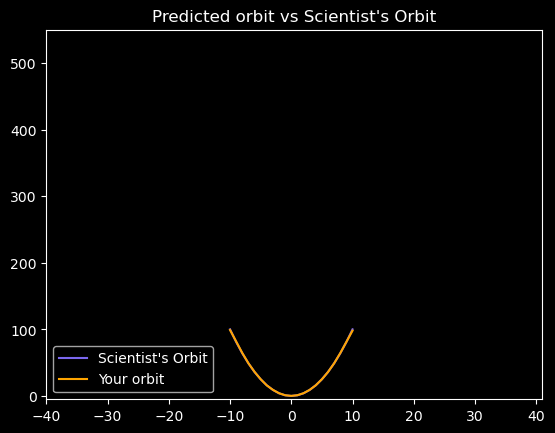

In [44]:
# Predict the twenty minutes orbit
twenty_min_orbit = model.predict(np.arange(-10, 11))
# Plot the twenty minute orbit 
plot_orbit(twenty_min_orbit)

3/3 [==============================] - 0s 814us/step


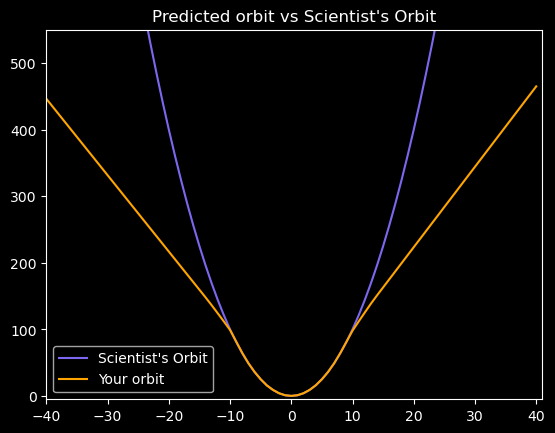

In [45]:
# Predict the twenty minutes orbit
twenty_min_orbit = model.predict(np.arange(-40, 41))
# Plot the twenty minute orbit 
plot_orbit(twenty_min_orbit)

Your model fits perfectly to the scientists trajectory for time values between -10 to +10, the region where the meteor crosses the impact region, so we won't be hit!

However, it starts to diverge when predicting for new values we haven't trained for.

This shows neural networks learn according to the data they are fed with.

Data quality and diversity are very important. You've barely scratched the surface of what neural networks can do. 